In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
#https://www.hl.co.uk/shares/stock-market-summary/ftse-small-cap/top-volume

In [3]:
tickers=["LLOY.L","VOD.L","RR.L","^FTSE"]

In [4]:
end_date=datetime.today()

In [5]:
start_date=end_date-timedelta(days=2*365)

In [6]:
close_df=pd.DataFrame()

In [7]:
for ticker in tickers:
  data = yf.download(ticker,start_date,end=end_date)
  close_df[ticker]=data['Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [8]:
close_df

,LLOY.L,VOD.L,RR.L,^FTSE
Date,,,,
2021-12-06,46.275002,112.879997,129.699997,7232.299805
2021-12-07,47.485001,111.879997,131.800003,7339.899902
2021-12-08,47.365002,113.099998,128.639999,7337.399902
2021-12-09,46.695000,113.199997,124.300003,7321.299805
2021-12-10,46.334999,113.199997,122.800003,7291.799805
...,...,...,...,...
2023-11-28,42.450001,70.860001,258.299988,7455.200195
2023-11-29,43.450001,70.809998,263.399994,7423.500000
2023-11-30,43.470001,71.330002,268.799988,7453.799805


In [9]:
returns = close_df.pct_change()
returns

,LLOY.L,VOD.L,RR.L,^FTSE
Date,,,,
2021-12-06,NaN,NaN,NaN,NaN
2021-12-07,0.026148,-0.008859,0.016191,0.014878
2021-12-08,-0.002527,0.010905,-0.023976,-0.000341
2021-12-09,-0.014146,0.000884,-0.033738,-0.002194
2021-12-10,-0.007710,0.000000,-0.012068,-0.004029
...,...,...,...,...
2023-11-28,0.009513,-0.002534,0.062089,-0.000737
2023-11-29,0.023557,-0.000706,0.019745,-0.004252
2023-11-30,0.000460,0.007344,0.020501,0.004082


In [10]:
mean_returns=returns.mean()
mean_returns

LLOY.L    0.000103
VOD.L    -0.000795
RR.L      0.002055
^FTSE     0.000112
dtype: float64

In [11]:
variance=returns.var()
variance

LLOY.L    0.000335
VOD.L     0.000257
RR.L      0.000959
^FTSE     0.000081
dtype: float64

In [12]:
cov_matrix=returns.cov()
cov_matrix

,LLOY.L,VOD.L,RR.L,^FTSE
LLOY.L,0.000335,0.000086,0.000259,0.000112
VOD.L,0.000086,0.000257,0.000097,0.000056
RR.L,0.000259,0.000097,0.000959,0.000135
^FTSE,0.000112,0.000056,0.000135,0.000081


In [13]:
proportions=np.array([0.5,0.2,0.3])
stock_returns=mean_returns[:-1]
portfolio_return= stock_returns.dot(proportions)*252
portfolio_return


0.12822264317489795

In [14]:
portfolio_variance = np.dot(proportions.T, np.dot(cov_matrix.iloc[:-1,:-1], proportions))*252
portfolio_variance

0.07227892487686936

In [15]:
betas={}

In [16]:
for ticker in tickers[:-1]:
  covariance = cov_matrix.loc [ticker,"^FTSE"]
  market_variance=variance[-1]
  beta = covariance/ market_variance
  betas[ticker] = beta

In [17]:
for ticker,beta in betas.items():
  print(f"{ticker}: Beta = {beta:.4f}")

LLOY.L: Beta = 1.3914
VOD.L: Beta = 0.6921
RR.L: Beta = 1.6732


<Axes: title={'center': 'Market and stocks Return History'}, xlabel='Date'>

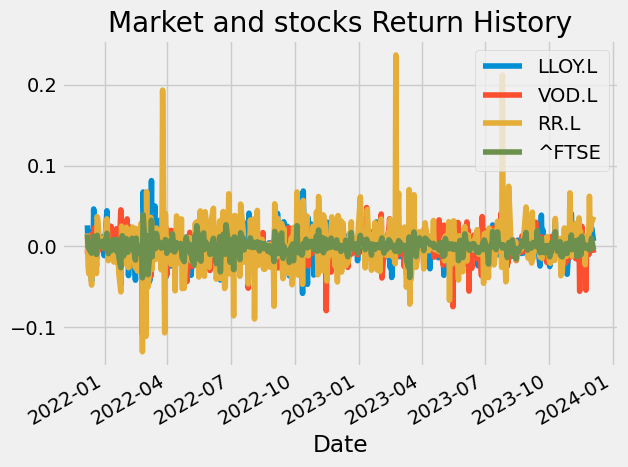

In [18]:
mes_actions=returns
mes_actions.plot(title="Market and stocks Return History")

In [20]:
betas_series = pd.Series(betas)
portfolio_beta = betas_series.dot(proportions)
portfolio_beta

1.3360721455415296

In [21]:
pip install fredapi

In [22]:
from fredapi import Fred
fred=Fred(api_key="6c37dd551d9d51704a86e9abc76034d4")
rate=fred.get_series_latest_release("IRLTLT01GBM156N")/100
rf=rate.iloc[-1]
rf


0.045695

In [23]:
excess_return=portfolio_return-rf
excess_return

0.08252764317489795

In [24]:
portfolio_volatility=np.sqrt(portfolio_variance)
portfolio_volatility

0.26884740072552193

In [25]:
sharpe_ratio=excess_return/portfolio_volatility
sharpe_ratio

0.3069683506412399

In [27]:
treynor_ratio=excess_return/portfolio_beta
treynor_ratio

0.06176885241586134